<a href="https://colab.research.google.com/github/wizard339/education/blob/main/language_model_intro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget https://storage.yandexcloud.net/natasha-nerus/data/nerus_lenta.conllu.gz

--2023-02-05 14:41:12--  https://storage.yandexcloud.net/natasha-nerus/data/nerus_lenta.conllu.gz
Resolving storage.yandexcloud.net (storage.yandexcloud.net)... 213.180.193.243, 2a02:6b8::1d9
Connecting to storage.yandexcloud.net (storage.yandexcloud.net)|213.180.193.243|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1961465886 (1.8G) [application/octet-stream]
Saving to: ‘nerus_lenta.conllu.gz’

nerus_lenta.conllu. 100%[===================>]   1.83G  24.9MB/s    in 78s     

2023-02-05 14:42:31 (24.0 MB/s) - ‘nerus_lenta.conllu.gz’ saved [1961465886/1961465886]



In [2]:
!pip install nerus > /dev/null

In [ ]:
import tqdm.notebook
from nerus import load_nerus

In [ ]:
docs = load_nerus('nerus_lenta.conllu.gz')

In [ ]:
all_texts = list()
for ind in tqdm.notebook.tnrange(500_000):
  doc = next(docs)
  all_texts.extend([text.text for text in doc.sents])

In [ ]:
len(all_texts)

5891388

In [ ]:
# сохраним наш список, чтобы не тратить время в случае падения среды исполнения
import pickle

with open('all_texts.pkl', 'wb') as f:
  pickle.dump(all_texts, f)

In [ ]:
sizes = dict()

In [ ]:
sizes_b = dict()

Chain rule для вычисления вероятности события

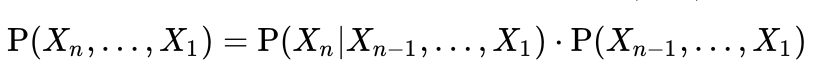

Предположение Марковости

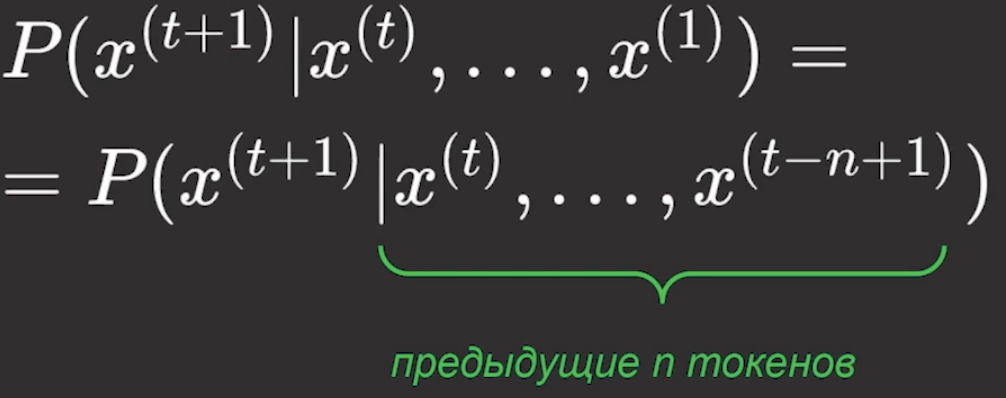

In [ ]:
import sys
from nltk import bigrams, trigrams
from collections import Counter, defaultdict


# limit = 1_000
# limit = 100_000
limit = 1_000_000

# своего рода модель
model = defaultdict(lambda: defaultdict(lambda: 0))

# считаем  
for sentence in tqdm.notebook.tqdm(all_texts[:limit]):
    for w1, w2 in bigrams(sentence.split(), pad_right=True, pad_left=True):
        model[(w1)][w2] += 1
 
# Преобразуем количества в вероятности
for w1 in model:
    total_count = float(sum(model[w1].values()))
    for w2 in model[w1]:
        model[w1][w2] /= total_count

sizes_b[limit] = sys.getsizeof(model)

In [ ]:
import sys
from nltk import bigrams, trigrams
from collections import Counter, defaultdict


# limit = 1_000
# limit = 100_000
limit = 1_000_000


# своего рода модель
model = defaultdict(lambda: defaultdict(lambda: 0))

# считаем 
for sentence in tqdm.notebook.tqdm(all_texts[:limit]):
    for w1, w2, w3 in trigrams(sentence.split(), pad_right=True, pad_left=True):
        model[(w1, w2)][w3] += 1
 
# Преобразуем количества в вероятности
for w1_w2 in model:
    total_count = float(sum(model[w1_w2].values()))
    for w3 in model[w1_w2]:
        model[w1_w2][w3] /= total_count

sizes[limit] = sys.getsizeof(model)

In [ ]:
model[('на', 'торгах')]

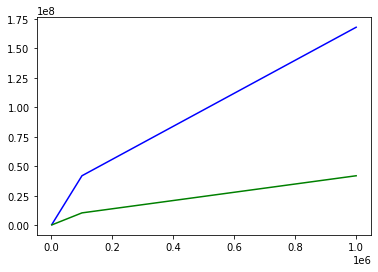

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd


plt.plot(list(sizes.keys()), pd.Series(sizes), 'b')
plt.plot(list(sizes.keys()), pd.Series(sizes_b), 'g') 
plt.show()

In [ ]:
import random

# Начальные слова для генерации
text = ['На',  'Россию']
sentence_finished = False
 
while not sentence_finished:
  # выбираем случайное значение для вероятностной границы
  r = random.random()
  accumulator = .0

  for word in model[tuple(text[-2:])].keys():
      accumulator += model[tuple(text[-2:])][word]
      # выбираем только слова, что имеют вероятность выше заданной ранее границы
      if accumulator >= r:
          text.append(word)
          break

  if text[-2:] == [None, None]:
      sentence_finished = True
 
print (' '.join([t for t in text if t]))

На Россию как «страну-агрессора» и сторону конфликта в Сирии вступает в силу в королевстве созданы все условия для жизни снова пришлось брать в руки полиции, а затем выстрелил в охранников, а затем повернулся и зашагал прочь.
